In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [2]:
dados = pd.read_json('dados_notas_col.json')
print(dados.id.nunique())
print(dados.shape)
dados

6395
(6395, 34)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,data,descricao,descricao_area_residencial,descricao_companhia_domiciliar,descricao_encaminhamento,descricao_historico,descricao_historico_disciplina,descricao_imovel,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_situacao_matricula_periodo,descricao_trabalho_responsavel,id,media_final,nome_escola_ensino_fundamental,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,professores,qnt_pc,qtd_pessoas_domicilio,renda_bruta_familiar,sigla
0,86,-1,87,-1,2016,2016,59067-400,1,05/05/2017,Matriculado,Urbana,Pais,Diálogo com professor(a),Técnico de Nível Médio em Edificações,Língua Portuguesa e Literatura I(90H),Financiado,Pós graduação incompleto,Pós graduação completo,Parda,Pós graduação completo,Pai,Aprovado,Serviço público,496915657473,86,Complexo Educacional Contemporâneo,85.0,06/12/2001,M,[1521],NaN,4,9000.00,CNAT
100002,69,-1,5,-1,2015,2016,59795-000,1,None,Matriculado,Urbana,Mãe,None,"Técnico de Nivel Médio em Agropecuária, na For...",Língua Portuguesa e Literatura I(90H),Alugado,Ensino fundamental incompleto,Ensino médio completo,Branca,Ensino médio completo,Pai,Dependência,Autônomo,458905053917,69,Escola Estadual António Francisco,92.0,16/12/1999,M,"[2688, 3538, 1222]",0.0,3,500.00,AP
100021,83,-1,77,-1,2016,2016,59200-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nivel Médio Informática,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio incompleto,Branca,Ensino médio completo,Pai,Aprovado,Autônomo,496533683389,83,IESC,99.0,01/06/2000,F,"[1592, 3388]",0.0,7,2500.00,SC
100034,85,87,75,75,2015,2015,59300-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nível Médio em Vestuário,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio completo,Parda,Ensino médio completo,Pai,Aprovado,Empresa privada,465878172049,85,escola municipal hermann gmeiner,100.0,18/01/2000,F,None,1.0,4,788.00,CA
10005,76,-1,32,-1,2015,2015,59104-340,1,None,Matriculado,Urbana,Pais,None,Técnico de Nível Médio em Edificações,Língua Portuguesa e Literatura I(90H),Próprio,Ensino fundamental incompleto,Ensino superior completo,Parda,Ensino superior completo,Pai,Reprovado,Autônomo,453130832545,76,E. E. Prof° Josino Macedo,98.0,18/05/1999,F,None,0.0,4,900.00,CNAT
100064,65,60,11,61,2015,2015,59032-600,1,None,Matriculado,Urbana,Pais,None,Técnico de Nível Médio em Manutenção e Suporte...,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio completo,Parda,Ensino médio completo,Pai,Dependência,Empresa privada,451212597729,65,Escola Municipal Prefeito Mario Eugênio Lira,95.0,07/08/2000,M,None,1.0,4,1760.00,CNAT
100095,20,-1,14,-1,2016,2016,59810-000,0,None,Transferido Interno,Urbana,Pai,None,Técnico de Nível Médio em Informática para Int...,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio completo,Parda,Ensino médio completo,Pai,Transf. Instituição,Empresa privada,498072732253,20,Escola Municipal Filomena Sampaio de Sousa,98.0,29/03/2000,M,"[37, 112, 3376]",1.0,5,900.00,CNAT
100108,87,90,87,85,2015,2015,59200-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nível Médio em Mecânica,Língua Portuguesa e Literatura I(90H),Alugado,Ensino fundamental completo,Ensino médio completo,Parda,Ensino médio completo,Pai,Aprovado,Empresa privada,458662486433,87,Creart,98.0,01/04/2000,F,None,2.0,5,2000.00,SC
100137,73,-1,86,-1,2016,2016,59380-000,1,None,Matriculado,Urbana,Pais,None,Técnico de Nível Médio em Alimentos,Língua Portuguesa e Literatura I(90H),Alugado,Ensino médio completo,Ensino médio completo,Branca,Ensino médio completo,Pai,Aprovado,Empresa privada,496631268009,73,CIVE,99.0,21/04/2001,M,[3283],NaN,4,1500.00,CN
100153,72,65,61,69,2015,2015,59600-160,1,None,Matriculado,Urbana,Pais,N

In [3]:
del dados['descricao_historico_disciplina']
del dados['professores']
del dados['id']
del dados['media_final']
del dados['percentual_frequencia']
del dados['nome_escola_ensino_fundamental']
del dados['qnt_pc']

#colocar novamente
del dados['cep']
del dados['data']
del dados['pessoa_fisica__nascimento_data']

#descricao_encaminhamento colocar booleano

In [4]:
y = dados.classe
X = dados

del X['classe']
X.shape


(6395, 23)

In [5]:
dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

(6395, 186)

In [6]:
dados_dummies.head(2)

dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')

dados_clean.shape

(6395, 186)

In [7]:
np.isfinite( dados_clean ).all()

LnguaPortuguesaeLiteraturaI90H                                      True
LnguaPortuguesaeLiteraturaII90H                                     True
MatemticaI120H                                                      True
MatemticaII90H                                                      True
ano_letivo__ano                                                     True
ano_letivo__ano_matricula_periodo                                   True
qtd_pessoas_domicilio                                               True
renda_bruta_familiar                                                True
descricao_Cancelado                                                 True
descricao_Cancelamento Compulsório                                  True
descricao_Concluído                                                 True
descricao_Evasão                                                    True
descricao_Intercâmbio                                               True
descricao_Matriculado                              

In [8]:
model = RandomForestClassifier()
clf = model.fit(dados_clean, y)

In [9]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


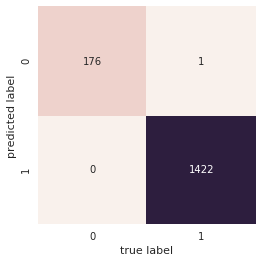

In [10]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:
"""
from sklearn.tree import export_graphviz
from sklearn import tree

export_graphviz(clf,
                feature_names=X.columns,
                filled=True,
                rounded=True)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
"""

'\nfrom sklearn.tree import export_graphviz\nfrom sklearn import tree\n\nexport_graphviz(clf,\n                feature_names=X.columns,\n                filled=True,\n                rounded=True)\n\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("iris") \n'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


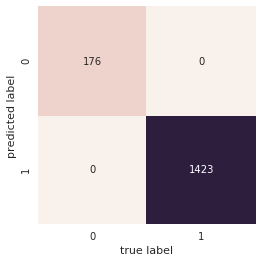

In [14]:
model = DecisionTreeClassifier()
clf = model.fit(dados_clean, y)

from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
export_graphviz(clf,
                feature_names=X.columns,
                filled=True,
                rounded=True, 
                out_file='tree.dot')

In [16]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

In [23]:
%matplotlib inline
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

In [27]:
dados_clean.columns[13]

'descricao_Matriculado'